Importar librerías

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

Carga de datos

In [53]:

data_path = 'data/wdbc.data'
columns = ['ID', 'Diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 
           'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 
           'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']
df = pd.read_csv(data_path, header=None, names=columns)
df.sample(5)

,ID,Diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
99,862548,M,14.42,19.77,94.48,642.5,0.09752,0.11410,0.093880,0.058390,...,16.33,30.86,109.50,826.4,0.1431,0.30260,0.319400,0.15650,0.2718,0.09353
109,864018,B,11.34,21.26,72.48,396.5,0.08759,0.06575,0.051330,0.018990,...,13.01,29.15,83.99,518.1,0.1699,0.21960,0.312000,0.08278,0.2829,0.08832
401,904647,B,11.93,10.91,76.14,442.7,0.08872,0.05242,0.026060,0.017960,...,13.80,20.14,87.64,589.5,0.1374,0.15750,0.151400,0.06876,0.2460,0.07262
276,8911230,B,11.33,14.16,71.79,396.6,0.09379,0.03872,0.001487,0.003333,...,12.20,18.99,77.37,458.0,0.1259,0.07348,0.004955,0.01111,0.2758,0.06386
343,898431,M,19.68,21.68,129.90,1194.0,0.09797,0.13390,0.186300,0.110300,...,22.75,34.66,157.60,1540.0,0.1218,0.34580,0.473400,0.22550,0.4045,0.07918


Total valores nulos o NA

In [54]:
df.isnull().sum().sum()

0

Eliminación de la columna ID

In [55]:
df.drop(['ID'], axis=1, inplace=True)

Codificación de etiquetas (M = maligno, B = benigno) a números -->

In [56]:
labelencoder_Y = LabelEncoder()
df['Diagnosis'] = labelencoder_Y.fit_transform(df['Diagnosis'])

Separación de las características y etiquetas

In [57]:
X = df.drop(['Diagnosis'], axis=1)
y = df['Diagnosis']

Normalización de las características

In [58]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

División del conjunto de datos en entrenamiento y prueba

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Implementación de Modelos

In [60]:
models = {
    "Regresión Logística": LogisticRegression(),
    "SVM": SVC(probability=True),
    "Random Forest": RandomForestClassifier()
}

Entrenamiento y predicción

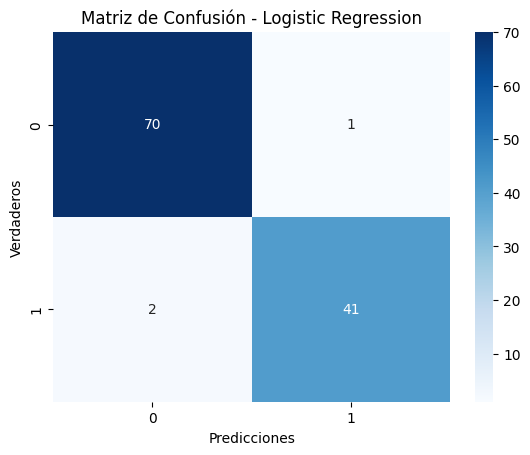

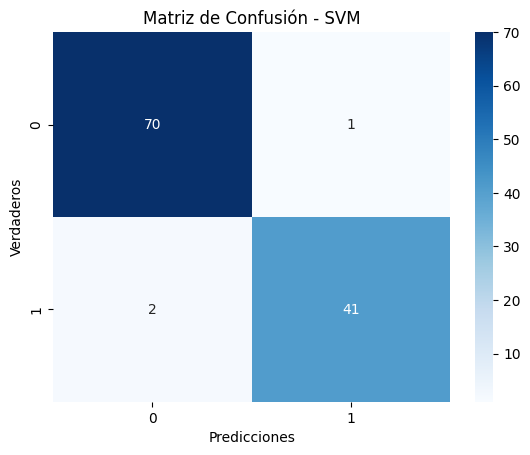

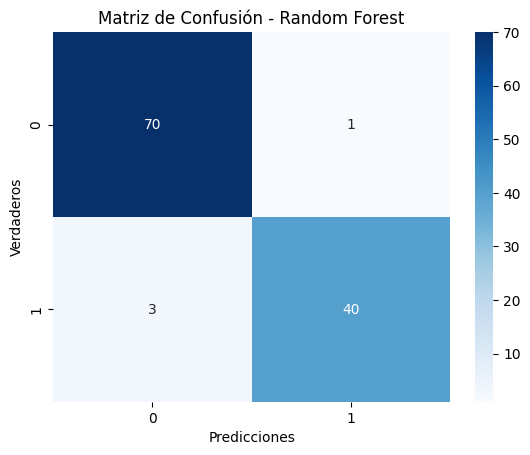

In [61]:
# Lista para almacenar las métricas de cada modelo
results = []

# Entrenamiento y predicción
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    probas = model.predict_proba(X_test)[:, 1]
    
    # Matriz de confusión
    cm = confusion_matrix(y_test, predictions)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Matriz de Confusión - {name}")
    plt.ylabel('Verdaderos')
    plt.xlabel('Predicciones')
    plt.show()
    
    # Calculamos las métricas de evaluación
    accuracy = accuracy_score(y_test, predictions)
    report = classification_report(y_test, predictions, output_dict=True)
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1 = report['weighted avg']['f1-score']
    auc_score = roc_auc_score(y_test, probas)
    
    # Agregamos los resultados al listado
    results.append({"Modelo": name, "Accuracy": accuracy, "Precision": precision, "Recall": recall, "F1-Score": f1, "AUC": auc_score})

Resumen de métricas por cada modelo

In [62]:
# Creamos un DataFrame con los resultados
results_df = pd.DataFrame(results)

# Mostramos la tabla de resultados
print(results_df)

                Modelo  Accuracy  Precision    Recall  F1-Score       AUC
0  Logistic Regression  0.973684   0.973719  0.973684  0.973621  0.997380
1                  SVM  0.973684   0.973719  0.973684  0.973621  0.997380
2        Random Forest  0.964912   0.965205  0.964912  0.964738  0.996397
